In [1]:
#import des librairies
import geopandas
import folium
import pandas 
import os
import json
import mapclassify
import json

# Relire la carte du monde

# Examiner les 3 fichiers de données (fournis sur la plateforme moodle) pour les pays, les villes  et fleuves du monde et mettre en œuvre la relecture des données. 

In [3]:
#import des données Pays, Villes et Fleuves
Pays = geopandas.read_file("zip://./ne_110m_admin_0_countries.zip")
Villes = geopandas.read_file("zip://./ne_110m_populated_places.zip")
Fleuves = geopandas.read_file("zip://./ne_50m_rivers_lake_centerlines.zip")

visualiser les premières lignes des  table Pays, Ville et Fleuves

In [ ]:
Pays.head()

In [ ]:
Villes.head()

In [ ]:
Fleuves.head()

In [ ]:
visualiser les dernieres lignes des  table Pays, Ville et Fleuves

In [ ]:
Pays.tail()

In [5]:
Villes.tail()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
172,VUT,Vanuatu,Oceania,282814.0,723.0,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518..."
173,YEM,Yemen,Asia,28036829.0,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,"POLYGON ((19.89577 -24.76779, 20.16573 -24.917..."
175,ZMB,Zambia,Africa,15972000.0,65170.0,"POLYGON ((23.21505 -17.52312, 22.56248 -16.898..."
176,ZWE,Zimbabwe,Africa,13805084.0,28330.0,"POLYGON ((29.43219 -22.09131, 28.79466 -21.639..."


In [ ]:
Fleuves.tail()

la type de donnée des couche Pays, Villes, Fleuves

In [15]:
type(Pays)   #la couche Pays est un GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [23]:
type(Villes)

geopandas.geodataframe.GeoDataFrame

In [24]:
type(Fleuves)

geopandas.geodataframe.GeoDataFrame

Determiner le nombre de lignes et de colonnes des couches pays, Villes et Fleuves

In [12]:
Pays.shape

(177, 6)

In [16]:
Villes.shape

(243, 2)

In [17]:
Fleuves.shape

(461, 3)

Visualiser les variables des couches Pays, Villes et Fleuves

In [18]:
Pays.columns

Index(['iso_a3', 'name', 'continent', 'pop_est', 'gdp_md_est', 'geometry'], dtype='object')

In [19]:
Villes.columns

Index(['name', 'geometry'], dtype='object')

In [20]:
Fleuves.columns

Index(['featurecla', 'name', 'geometry'], dtype='object')

Visualiser le systéme de projection  des couches Pays , Villes et Fleuves

In [13]:
Pays.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
Villes.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
Fleuves.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Toutes ces couches ont été projectées au systéme de projection WGS 84

# Déterminer un moyen de sélectionner les pays d’un continent. Examiner le fichier de données geopandas pour trouver le nom des continents

Selection des pays du continent africain

In [25]:
#Selection des pays du continent africain
Afrique =Pays[Pays['continent'] == 'Africa']

In [26]:
#la table de couche Africa , des pays de l'afrique
Afrique.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
11,BDI,Burundi,Africa,11466756.0,7892.0,"POLYGON ((29.34000 -4.49998, 29.27638 -3.29391..."
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.15447 11.94015, 1.93599 11.64115, ..."
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."


In [27]:
Afrique.shape # nous avons au total de 52 pays selectionnés dans la couche Afrique

(51, 6)

In [30]:
type(Afrique)

geopandas.geodataframe.GeoDataFrame

In [32]:
Afrique.columns

Index(['iso_a3', 'name', 'continent', 'pop_est', 'gdp_md_est', 'geometry'], dtype='object')

In [33]:
#trier le nom des pays de la table afrique par ordre croissant
Afrique.sort_values(['name'], ascending=[True])

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
45,DZA,Algeria,Africa,40969443.0,609400.0,"POLYGON ((4.26742 19.15527, 3.15813 19.05736, ..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.15447 11.94015, 1.93599 11.64115, ..."
11,BDI,Burundi,Africa,11466756.0,7892.0,"POLYGON ((29.34000 -4.49998, 29.27638 -3.29391..."
32,CMR,Cameroon,Africa,24994885.0,77240.0,"POLYGON ((15.27946 7.42192, 14.77655 6.40850, ..."
26,CAF,Central African Rep.,Africa,5625118.0,3206.0,"POLYGON ((15.27946 7.42192, 16.10623 7.49709, ..."
154,TCD,Chad,Africa,12075985.0,30590.0,"POLYGON ((22.86417 11.14240, 22.23113 10.97189..."
34,COG,Congo,Africa,4954674.0,30270.0,"POLYGON ((12.99552 -4.78110, 12.62076 -4.43802..."


Examiner le fichier de données geopandas pour trouver le nom des continents

In [41]:
#trouver le nom des continents avec la fonction dissolve
continents = Pays.dissolve(by='continent', aggfunc='sum')

In [42]:
#Trier le nom des continents pâr ordre croissant
continents.sort_values(['continent'], ascending=[True])

,geometry,pop_est,gdp_md_est
continent,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.219176e+09,6025295.50
Antarctica,"MULTIPOLYGON (((-62.25539 -80.86318, -64.48813...",4.050000e+03,810.00
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4.389145e+09,55434607.77
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",7.463985e+08,25284877.00
North America,"MULTIPOLYGON (((-156.02368 19.81422, -155.8500...",5.730421e+08,23505137.00
Oceania,"MULTIPOLYGON (((148.28907 -40.87544, 148.35986...",3.678284e+07,1412885.00
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",1.400000e+02,16.00
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",4.185407e+08,6377091.80


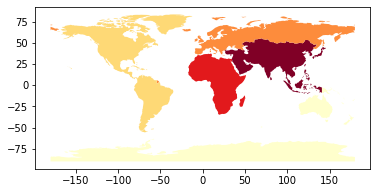

In [85]:
#afficher la carte avec le plot
continents.plot(column = 'pop_est', scheme='naturalbreaks', cmap='YlOrRd');

# Choisir un continent au hasard à partir d’une liste Python contenant les noms des continents. Et tracer pour le continent sélectionné, les frontières des pays, les villes et les fleuves associés.

Nous allons reprendre le continent selectionné précédemmment qui était le continent africain 

In [43]:
#selection des villes du continent africain avec la fonction clip
Villes_Afrique=geopandas.clip(Villes, Afrique)

In [46]:
Villes_Afrique.head()

,name,geometry
3,Lobamba,POINT (31.20000 -26.46667)
16,Mbabane,POINT (31.13333 -26.31665)
74,Maputo,POINT (32.58722 -25.95333)
87,Antananarivo,POINT (47.51468 -18.91469)
51,Harare,POINT (31.04276 -17.81584)


In [47]:
#trier les villes africaine selectionnées par odre croissant
#Villes_Afrique.sort_values(['name'], ascending=[True])

In [48]:
#selection des Fleuves du continent africain avec la fonction clip
Fleuves_Afrique=geopandas.clip(Fleuves, Afrique)

In [49]:
Fleuves_Afrique.head()

,featurecla,name,geometry
298,River,Nile,"MULTILINESTRING ((32.49014 15.63455, 32.53541 ..."
75,Lake Centerline,Suez Canal,"LINESTRING (32.56094 30.18066, 32.35950 30.42429)"
223,River,Ismailiya Canal,"LINESTRING (31.23761 30.12069, 31.28215 30.128..."
378,River,Suez Canal,"MULTILINESTRING ((32.56083 30.18152, 32.56569 ..."
342,River,Rosetta Branch,"LINESTRING (31.23761 30.12069, 31.21182 30.139..."


In [51]:
##trier les Fleuves africaine selectionnées par odre croissant
#Fleuves_Afrique.sort_values(['name'], ascending=[True])

Et tracer pour le continent sélectionné, les frontières des pays, les villes et les fleuves associés.

# La cartes  folium avec les contours des  pays , villes , Fleuves africain

In [77]:
#afficher le contour des pays africain
m2 = Afrique.explore(
     column="name",  
     legend=False, # avec le False on masque l'apperence de la legende sur la carte
     name="Pays",
     legend_kwds=dict(colorbar=False)  
)
#ajouter les Villes sur la cartes 
Villes_Afrique.explore(
     m=m2, # pass the map object
     color="blue", # couleur des points
     marker_kwds=dict(radius=5, fill=True), # definir la taille des points le remplissage
     tooltip="name", # montrer le nom de la colonne "name"
     tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
     name="cities"# name of the layer in the map
)
folium.TileLayer('Stamen Toner', control=True).add_to(m2)  # la gestion des couche la cartes: fond de carte, couche Pays etc

folium.LayerControl().add_to(m2)     # use folium to add layer control


In [76]:
m2

In [83]:
m2.save("contours_Pays_Afrique_Ville.html")

# La cartes  folium avec les population des  pays , villes  africain

In [81]:
#afficher le contour des pays africain
m_pop = Afrique.explore(
     column="pop_est", 
     scheme="quantiles",
     legend=True, # avec le False on masque l'apperence de la legende sur la carte
     name="Pays",
     legend_kwds=dict(colorbar=False)  
)
#ajouter les Villes sur la cartes 
Villes_Afrique.explore(
     m=m_pop, # pass the map object
     color="blue", # couleur des points
     marker_kwds=dict(radius=5, fill=True), # definir la taille des points le remplissage
     tooltip="name", # montrer le nom de la colonne "name"
     tooltip_kwds=dict(labels=False), # do not show column label in the tooltip
     name="cities"# name of the layer in the map
)
folium.TileLayer('Stamen Toner', control=True).add_to(m_pop)  # la gestion des couche la cartes: fond de carte, couche Pays etc

folium.LayerControl().add_to(m_pop)     # use folium to add layer control


In [82]:
m_pop

In [84]:
m_pop.save("carte_Choropleth_Afrique.html")